2. 数值验证格式的精度。

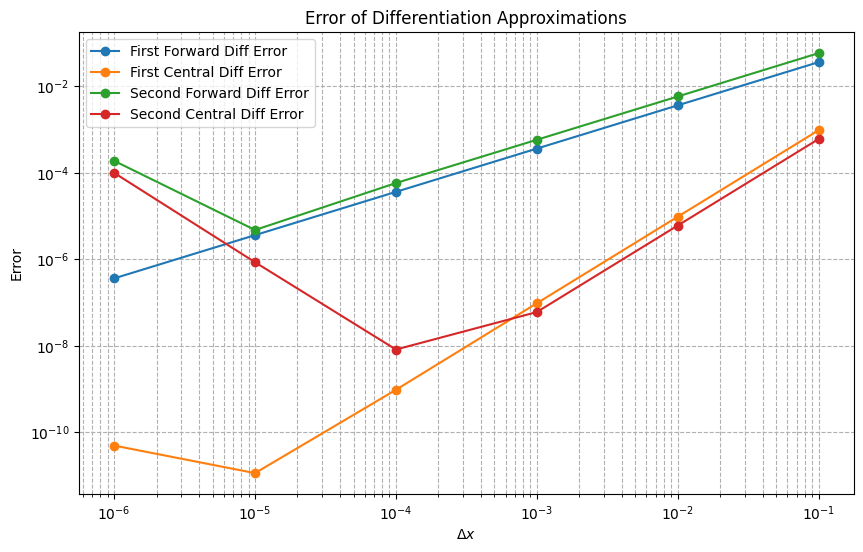

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数u及其导数
def u(x):
    return np.sin(x)

def u_prime(x):
    return np.cos(x)

def u_double_prime(x):
    return -np.sin(x)

# 定义差分近似函数
def first_forward_diff(u, x, dx):
    return (u(x + dx) - u(x)) / dx

def first_central_diff(u, x, dx):
    return (u(x + dx) - u(x - dx)) / (2 * dx)

def second_forward_diff(u, x, dx):
    return (u(x + 2 * dx) - 2 * u(x + dx) + u(x)) / dx**2   

def second_central_diff(u, x, dx):
    return (u(x + dx) - 2 * u(x) + u(x - dx)) / dx**2

# 验证精度
# 选择一组x值和dx值
x_values = [1, 2, 3, 4, 5]
dx_values = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])

# 计算差分近似和真实值
first_forward_errors = []
first_central_errors = []
second_forward_errors = []
second_central_errors = []

for dx in dx_values:
    # 对x_values取平均
    first_forward_error = 0
    first_central_error = 0
    second_forward_error = 0
    second_central_error = 0
    for x in x_values:
        first_forward_error += abs(first_forward_diff(u, x, dx) - u_prime(x))
        first_central_error += abs(first_central_diff(u, x, dx) - u_prime(x))
        second_forward_error += abs(second_forward_diff(u, x, dx) - u_double_prime(x))
        second_central_error += abs(second_central_diff(u, x, dx) - u_double_prime(x))
        
    first_forward_errors.append(first_forward_error / len(x_values))
    first_central_errors.append(first_central_error / len(x_values))
    second_forward_errors.append(second_forward_error / len(x_values))
    second_central_errors.append(second_central_error / len(x_values))
    
# 绘制误差图
plt.figure(figsize=(10, 6))
plt.loglog(dx_values, first_forward_errors, '-o', label='First Forward Diff Error')
plt.loglog(dx_values, first_central_errors, '-o', label='First Central Diff Error')
plt.loglog(dx_values, second_forward_errors, '-o', label='Second Forward Diff Error')
plt.loglog(dx_values, second_central_errors, '-o', label='Second Central Diff Error')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title('Error of Differentiation Approximations')
plt.show()